In [1]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

In [2]:
df = pd.read_excel("C:\\Users\\Marat Gilmanov\\CMPRO Dropbox\\Аналитика\\Проекты\\61. Востокцемент\\Отчет\\Глава 3\\Цена кв.м жилья.xls"
                   , sheet_name='Модель 1'
                   , skiprows=[0]+[i for i in range(13, 100)],
                   usecols='A:K')

In [3]:
df

,Год,"Стоимость 1 кв. м жилья, руб","Общая площадь нежилых введенных зданий, тыс. кв. м","Средневзвешенная процентная ставка ЦБ, %","Объем работ по виду деятельности ""Строительство"", млрд руб","Расходы бюджета (итого), млн руб","Расходы бюджета, связанные с инвестиционной деятельностью, млн руб","Объем бюджетных ассигнований по госпрограмме, млн руб","Объем предоставленных ипотечных кредитов, млн руб","Расходы, не связанные с СМР, руб",Средневзвешенная ставка по ипотеке
0,2013,58355.045000,973.35,5.500000,319.663744,NaN,NaN,NaN,64314.000000,11544.045000,12.585015
1,2014,61801.600000,861.47,7.967611,313.819580,NaN,NaN,20113.7817,90001.000000,13731.600000,12.193329
2,2015,64605.755000,939.00,12.475806,300.461094,9.199256e+05,174938.653000,25205.2980,57075.000000,14153.755000,13.848593
3,2016,66026.857500,834.64,10.562500,374.976305,8.900598e+05,120254.223000,37183.9459,71949.000000,10965.857500,12.893545
4,2017,66210.010000,1251.80,9.103239,446.354681,9.169362e+05,91899.588000,13396.2379,99964.000000,12286.010000,10.290785
5,2018,69314.282500,1177.50,7.411585,498.327225,1.032802e+06,107860.239000,21353.9874,176493.000000,14191.282500,9.557828
6,2019,71303.590000,1797.10,7.309476,549.074019,1.208920e+06,136922.438000,47755.0568,169752.000000,11340.590000,9.944987
7,2020,86558.765000,1328.10,5.025896,632.277842,1.350003e+06,140799.991000,54067.9114,274771.000000,21583.765000,6.867831
8,2021,102739.480000,1316.20,5.772638,769.462093,1.456474e+06,149062.528000,41662.0009,375092.000000,28685.480000,6.512352
9,2022,123324.175000,1415.20,10.547619,1030.848593,1.666272e+06,235486.713000,34816.7325,344941.000000,42312.175000,6.071726


In [4]:
df = df.loc[:, df.columns != 'Год']

In [5]:
df.corr()

,"Стоимость 1 кв. м жилья, руб","Общая площадь нежилых введенных зданий, тыс. кв. м","Средневзвешенная процентная ставка ЦБ, %","Объем работ по виду деятельности ""Строительство"", млрд руб","Расходы бюджета (итого), млн руб","Расходы бюджета, связанные с инвестиционной деятельностью, млн руб","Объем бюджетных ассигнований по госпрограмме, млн руб","Объем предоставленных ипотечных кредитов, млн руб","Расходы, не связанные с СМР, руб",Средневзвешенная ставка по ипотеке
"Стоимость 1 кв. м жилья, руб",1.000000,0.585796,0.089124,0.973769,0.930760,0.845034,0.340840,0.954272,0.984013,-0.838683
"Общая площадь нежилых введенных зданий, тыс. кв. м",0.585796,1.000000,-0.207185,0.663512,0.633014,0.326787,0.483704,0.652711,0.482244,-0.705785
"Средневзвешенная процентная ставка ЦБ, %",0.089124,-0.207185,1.000000,0.055763,-0.294673,0.343251,-0.462849,-0.125434,0.126851,0.324641
"Объем работ по виду деятельности ""Строительство"", млрд руб",0.973769,0.663512,0.055763,1.000000,0.875733,0.789262,0.304294,0.963458,0.939111,-0.813660
"Расходы бюджета (итого), млн руб",0.930760,0.633014,-0.294673,0.875733,1.000000,0.760869,0.484874,0.903035,0.910292,-0.903034
"Расходы бюджета, связанные с инвестиционной деятельностью, млн руб",0.845034,0.326787,0.343251,0.789262,0.760869,1.000000,0.211708,0.695958,0.874321,-0.448421
"Объем бюджетных ассигнований по госпрограмме, млн руб",0.340840,0.483704,-0.462849,0.304294,0.484874,0.211708,1.000000,0.403461,0.245154,-0.466715
"Объем предоставленных ипотечных кредитов, млн руб",0.954272,0.652711,-0.125434,0.963458,0.903035,0.695958,0.403461,1.000000,0.911244,-0.878909
"Расходы, не связанные с СМР, руб",0.984013,0.482244,0.126851,0.939111,0.910292,0.874321,0.245154,0.911244,1.000000,-0.794213
Средневзвешенная ставка по ипотеке,-0.838683,-0.705785,0.324641,-0.813660,-0.903034,-0.448421,-0.466715,-0.878909,-0.794213,1.000000


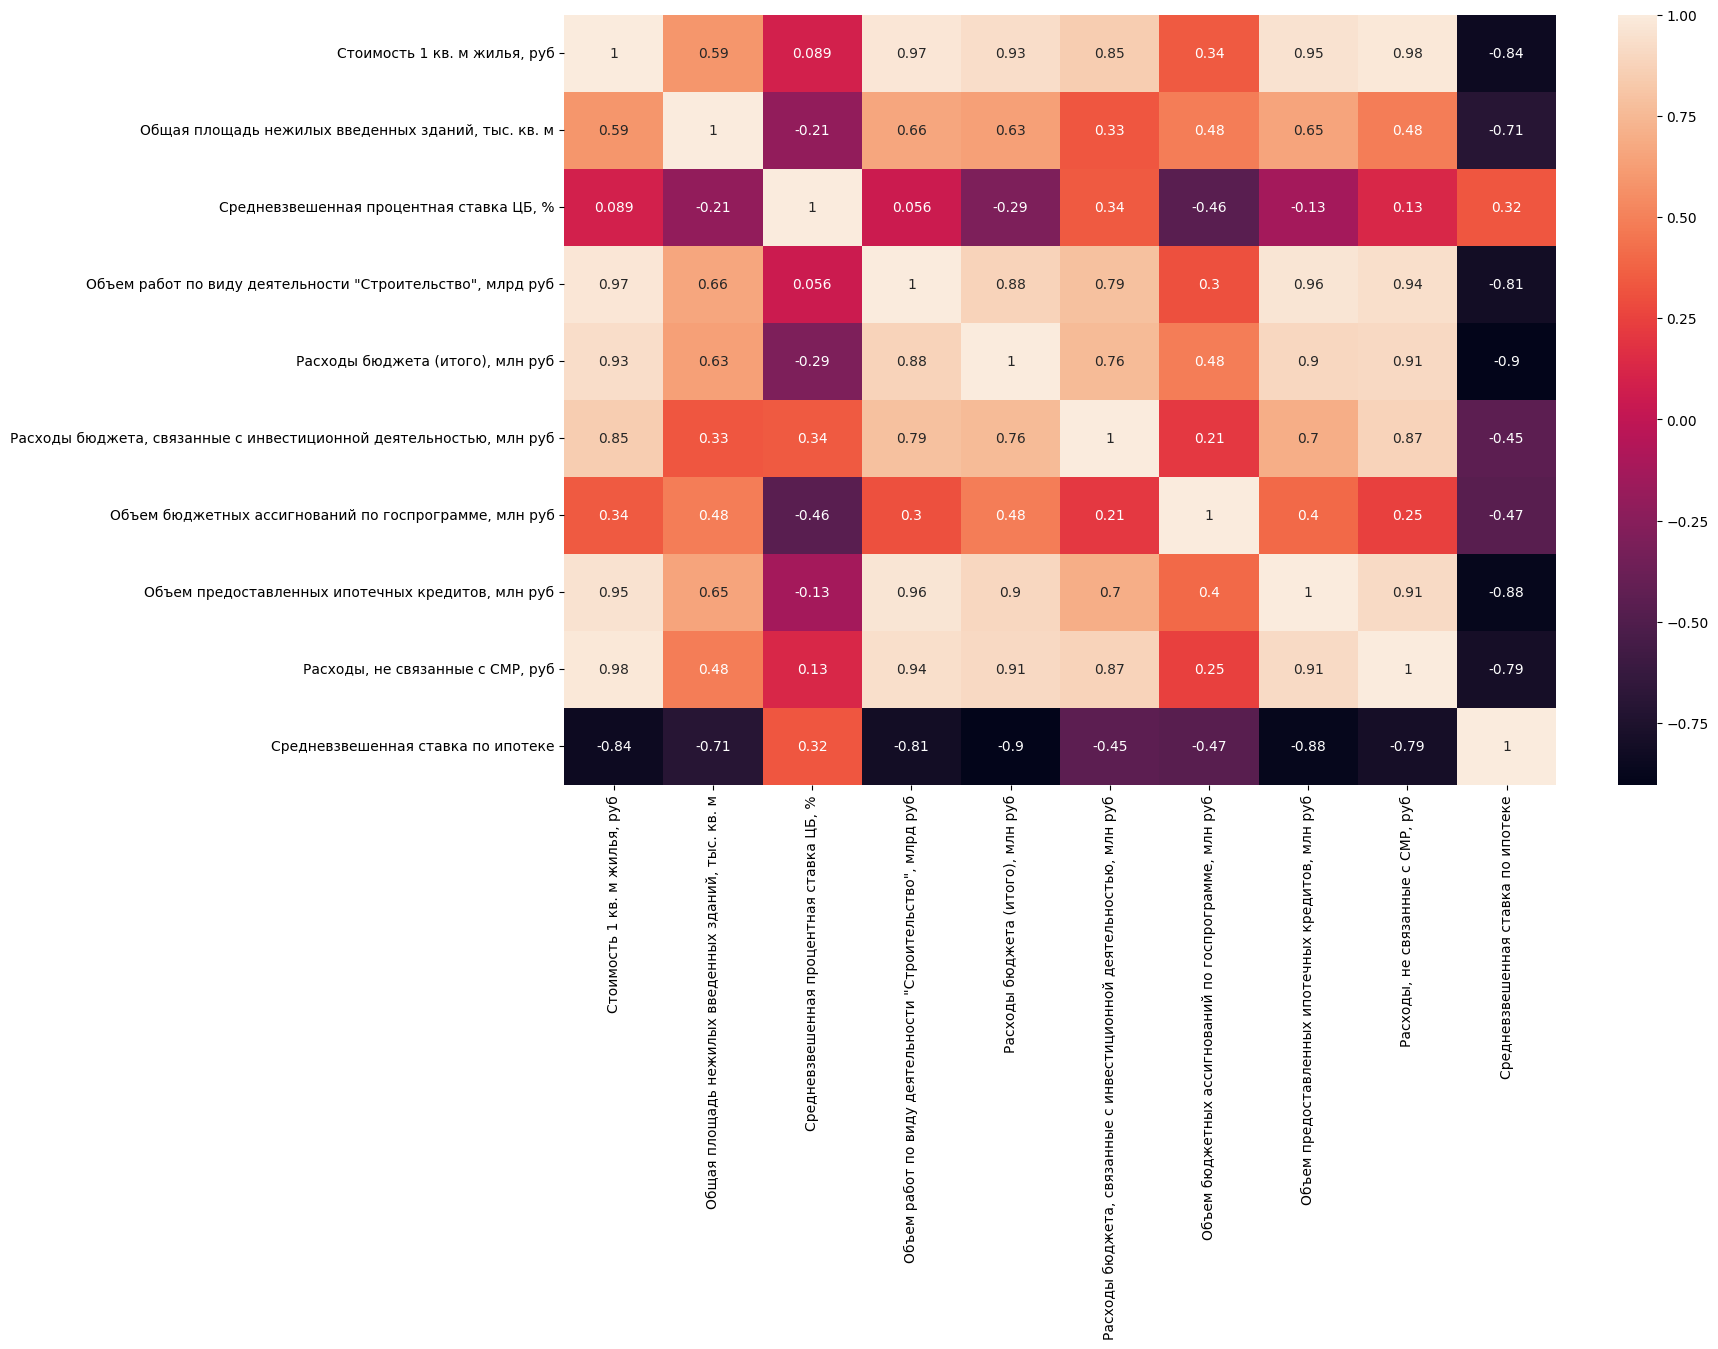

In [6]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":10})
plt.show()

# Простая линейная регрессия

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [8]:
X = df[['Средневзвешенная процентная ставка ЦБ, %', 'Объем предоставленных ипотечных кредитов, млн руб']]
y = df['Стоимость 1 кв. м жилья, руб']

In [10]:
model = LinearRegression()

In [11]:
model.fit(X, y)

LinearRegression()

In [12]:
model.coef_, model.intercept_

(array([2.34765222e+03, 1.60374231e-01]), 29596.40306057391)

In [13]:
1 - ( 1-model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )

0.9436736518275354

# Модель Lasso

In [14]:
X_Lasso = df.drop(['Стоимость 1 кв. м жилья, руб', 'Расходы бюджета (итого), млн руб', \
             'Расходы бюджета, связанные с инвестиционной деятельностью, млн руб', \
                'Объем бюджетных ассигнований по госпрограмме, млн руб'] , axis=1)

In [15]:
X_Lasso

,"Общая площадь нежилых введенных зданий, тыс. кв. м","Средневзвешенная процентная ставка ЦБ, %","Объем работ по виду деятельности ""Строительство"", млрд руб","Объем предоставленных ипотечных кредитов, млн руб","Расходы, не связанные с СМР, руб",Средневзвешенная ставка по ипотеке
0,973.35,5.500000,319.663744,64314.000000,11544.045000,12.585015
1,861.47,7.967611,313.819580,90001.000000,13731.600000,12.193329
2,939.00,12.475806,300.461094,57075.000000,14153.755000,13.848593
3,834.64,10.562500,374.976305,71949.000000,10965.857500,12.893545
4,1251.80,9.103239,446.354681,99964.000000,12286.010000,10.290785
5,1177.50,7.411585,498.327225,176493.000000,14191.282500,9.557828
6,1797.10,7.309476,549.074019,169752.000000,11340.590000,9.944987
7,1328.10,5.025896,632.277842,274771.000000,21583.765000,6.867831
8,1316.20,5.772638,769.462093,375092.000000,28685.480000,6.512352
9,1415.20,10.547619,1030.848593,344941.000000,42312.175000,6.071726


In [16]:
scaler = StandardScaler()
scaler.fit(X_Lasso)
X_Lasso_st = scaler.transform(X_Lasso)
X_Lasso_st

array([[-0.86016083, -1.22869534, -0.85735683, -0.93029745, -0.75302918,
         1.02748451],
       [-1.2426645 , -0.13767303, -0.87495718, -0.76248789, -0.56642076,
         0.88398508],
       [-0.97759917,  1.85556689, -0.91518775, -0.97758881, -0.53040901,
         1.49041388],
       [-1.3343929 ,  1.00962329, -0.69077689, -0.88041907, -0.80235121,
         1.14051897],
       [ 0.09182475,  0.36442993, -0.47581296, -0.69740102, -0.68973618,
         0.18696164],
       [-0.16219762, -0.3835127 , -0.31929185, -0.19744784, -0.52720775,
        -0.08156733],
       [ 1.95613697, -0.42865911, -0.16646223, -0.24148585, -0.77038482,
         0.0602737 ],
       [ 0.35268487, -1.43831408,  0.08411535,  0.44458849,  0.10340473,
        -1.06708488],
       [ 0.31200026, -1.10815208,  0.497261  ,  1.09997145,  0.70921341,
        -1.19731942],
       [ 0.65046883,  1.00304387,  1.28445556,  0.90299921,  1.87163265,
        -1.35874919],
       [ 1.21389933,  0.49234237,  2.43401376,  2.

In [17]:
model_Lasso = Lasso()

In [18]:
model_Lasso.fit(X_Lasso_st, y)

Lasso()

In [19]:
model_Lasso.coef_, model_Lasso.intercept_

(array([  672.09865006,  2071.52412611,  3360.82083003,  6236.5184056 ,
        13265.74396847, -2435.35667816]),
 82184.64575757577)

In [20]:
predictions = model_Lasso.predict(X_Lasso_st)

In [21]:
predictions


array([ 57886.23741837,  63701.60376213,  65532.96202589,  62145.57780277,
        67447.62819141,  72181.54991186,  70179.38870453,  86468.0362927 ,
       100954.11760379, 122785.68914335, 134748.31247655])

In [22]:
features_Lasso = pd.DataFrame({'feature': X_Lasso.columns, 'coeff': model_Lasso.coef_})
features_Lasso

,feature,coeff
0,"Общая площадь нежилых введенных зданий, тыс. к...",672.098650
1,"Средневзвешенная процентная ставка ЦБ, %",2071.524126
2,"Объем работ по виду деятельности ""Строительств...",3360.820830
3,"Объем предоставленных ипотечных кредитов, млн руб",6236.518406
4,"Расходы, не связанные с СМР, руб",13265.743968
5,Средневзвешенная ставка по ипотеке,-2435.356678


In [23]:
model_Lasso.score(X_Lasso_st, y)

0.9948952588984801

In [24]:
1 - ( 1-model_Lasso.score(X_Lasso_st, y) ) * ( len(y) - 1 ) / ( len(y) - X_Lasso_st.shape[1] - 1 )

0.9872381472462002

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
print('MAE: {:.3f}'.format(mean_absolute_error(y, predictions)))
print('MSE: {:.3f}'.format(mean_squared_error(y, predictions)))
print('R2: {:.3f}'.format(r2_score(y, predictions)))

MAE: 1434.339
MSE: 3197428.577
R2: 0.995


# RIDGE

In [27]:
from sklearn.linear_model import Ridge

In [28]:
model_Ridge = Ridge()

In [29]:
X_Ridge = df.drop(['Стоимость 1 кв. м жилья, руб', 'Расходы бюджета (итого), млн руб', \
             'Расходы бюджета, связанные с инвестиционной деятельностью, млн руб', \
                'Объем бюджетных ассигнований по госпрограмме, млн руб'] , axis=1)

In [30]:
scaler = StandardScaler()
scaler.fit(X_Ridge)
X_Ridge_st = scaler.transform(X_Ridge)
X_Ridge_st

array([[-0.86016083, -1.22869534, -0.85735683, -0.93029745, -0.75302918,
         1.02748451],
       [-1.2426645 , -0.13767303, -0.87495718, -0.76248789, -0.56642076,
         0.88398508],
       [-0.97759917,  1.85556689, -0.91518775, -0.97758881, -0.53040901,
         1.49041388],
       [-1.3343929 ,  1.00962329, -0.69077689, -0.88041907, -0.80235121,
         1.14051897],
       [ 0.09182475,  0.36442993, -0.47581296, -0.69740102, -0.68973618,
         0.18696164],
       [-0.16219762, -0.3835127 , -0.31929185, -0.19744784, -0.52720775,
        -0.08156733],
       [ 1.95613697, -0.42865911, -0.16646223, -0.24148585, -0.77038482,
         0.0602737 ],
       [ 0.35268487, -1.43831408,  0.08411535,  0.44458849,  0.10340473,
        -1.06708488],
       [ 0.31200026, -1.10815208,  0.497261  ,  1.09997145,  0.70921341,
        -1.19731942],
       [ 0.65046883,  1.00304387,  1.28445556,  0.90299921,  1.87163265,
        -1.35874919],
       [ 1.21389933,  0.49234237,  2.43401376,  2.

In [31]:
model_Ridge.fit(X_Ridge_st, y)

Ridge()

In [32]:
model_Ridge.coef_, model_Ridge.intercept_

(array([   53.5764215 ,  2529.5925007 ,  6111.52199235,  5860.0728487 ,
         9205.06739864, -3977.76142642]),
 82184.64575757577)

In [33]:
predictions_Ridge = model_Ridge.predict(X_Ridge_st)
predictions_Ridge

array([ 57320.32442475,  63224.03388995,  64693.20432786,  63363.66191363,
        69023.90565126,  73568.87958822,  71441.45489182,  86881.04312475,
       100174.13102463, 120531.69212592, 133808.77237056])

In [34]:
features_Ridge = pd.DataFrame({'feature': X_Ridge.columns, 'coeff': model_Ridge.coef_})

In [35]:
features_Ridge

,feature,coeff
0,"Общая площадь нежилых введенных зданий, тыс. к...",53.576422
1,"Средневзвешенная процентная ставка ЦБ, %",2529.592501
2,"Объем работ по виду деятельности ""Строительств...",6111.521992
3,"Объем предоставленных ипотечных кредитов, млн руб",5860.072849
4,"Расходы, не связанные с СМР, руб",9205.067399
5,Средневзвешенная ставка по ипотеке,-3977.761426


In [36]:
model_Ridge.intercept_

82184.64575757577

In [37]:
model_Ridge.score(X_Ridge_st, y)

0.9926392015446046

In [38]:
1 - ( 1-model_Ridge.score(X_Ridge_st, y) ) * ( len(y) - 1 ) / ( len(y) - X_Ridge_st.shape[1] - 1 )

0.9815980038615115